In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle

In [3]:
from helpers.eda import *
from helpers.data_prep import *

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.float_format", lambda x : "%.4f" %x)
pd.set_option("display.width" , 200)

In [6]:
train_path = "/Users/gokhanersoz/Desktop/VBO_Dataset/house_prices/train.csv"
test_path = "/Users/gokhanersoz/Desktop/VBO_Dataset/house_prices/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
df = train.append(test).reset_index(drop =True)

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))
print("DataFrame Shape : {}".format(df.shape))

Train Shape : (1460, 81)
Test Shape : (1459, 80)
DataFrame Shape : (2919, 81)


In [7]:
check_df(df)

##################### SHAPE ######################

(2919, 81)

##################### TYPES ######################

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

###################### HEAD ######################

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr

In [8]:
df.SalePrice.nunique()

663

In [9]:
def na_values(dataframe, plot = False):
    
    na_values = dataframe.isnull().sum()
    na_values = na_values[na_values > 0 ]
    na_values = pd.DataFrame(na_values)
    na_values.columns = ["NA_Values"]
    na_values["Ratio"] = round(na_values["NA_Values"] / len(dataframe) * 100 , 5)
    na_values = na_values.sort_values("Ratio" , ascending = False)
    
    if plot :
        
        x = na_values.index
        x = [str(i)+"_"+str(j) for i,j in zip(x,na_values.Ratio)]
        y = na_values["Ratio"]

        size = 15
        plt.figure(figsize = (15,7))
        sns.barplot(x, y)
        plt.xticks(rotation = 90,fontsize = size)
        plt.ylabel("RATIO" , fontsize = size)
        plt.title("NA VALUES", fontsize = size)
        plt.show()
        
    return na_values

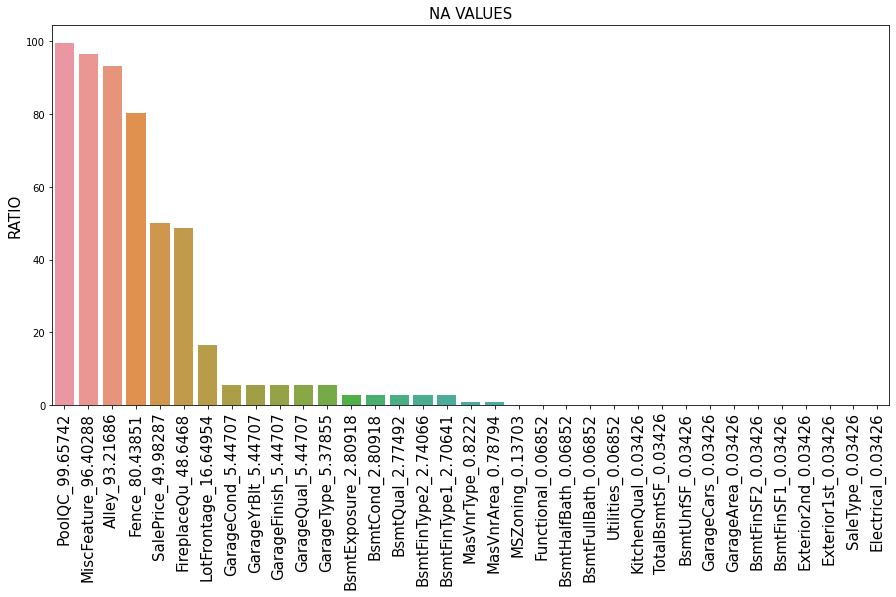

PoolQC  MiscFeature     Alley     Fence  SalePrice  FireplaceQu  LotFrontage  GarageCond  GarageYrBlt  GarageFinish  GarageQual  GarageType  BsmtExposure  BsmtCond  BsmtQual  \
NA_Values 2909.0000    2814.0000 2721.0000 2348.0000  1459.0000    1420.0000     486.0000    159.0000     159.0000      159.0000    159.0000    157.0000       82.0000   82.0000   81.0000   
Ratio       99.6574      96.4029   93.2169   80.4385    49.9829      48.6468      16.6495      5.4471       5.4471        5.4471      5.4471      5.3785        2.8092    2.8092    2.7749   

           BsmtFinType2  BsmtFinType1  MasVnrType  MasVnrArea  MSZoning  Functional  BsmtHalfBath  BsmtFullBath  Utilities  KitchenQual  TotalBsmtSF  BsmtUnfSF  GarageCars  GarageArea  BsmtFinSF2  \
NA_Values       80.0000       79.0000     24.0000     23.0000    4.0000      2.0000        2.0000        2.0000     2.0000       1.0000       1.0000     1.0000      1.0000      1.0000      1.0000   
Ratio            2.7407        2.7064      0.8222      0.7879    0.1370      0.0685        0.0685        0.0685     0.0685       0.0343       0.0343     0.0343      0.0343      0.0343      0.0343   

           BsmtFinSF1  Exterior2nd  Exterior1st  SaleType  Electrical  
NA_Values      1.0000       1.0000       1.0000    1.0000      1.0000  
Ratio          0.0343       0.0343       0.0343    0.0343      0.0343

In [10]:
na_ = na_values(df,plot = True)
na_.T

In [11]:
def high_correlated_cols(dataframe, plot = False, corr_th = .90):
    
    corr = dataframe.corr()
    corr_matrix = corr
    upper_triangle_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape),k = -1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if (any(upper_triangle_matrix[col] > corr_th))]
    
    if plot :
        
        plt.figure(figsize = (20,10))
        sns.heatmap(upper_triangle_matrix, cmap = "viridis", fmt = ".1f", annot = True, linewidths=.1)
        plt.show()
        
    return drop_list

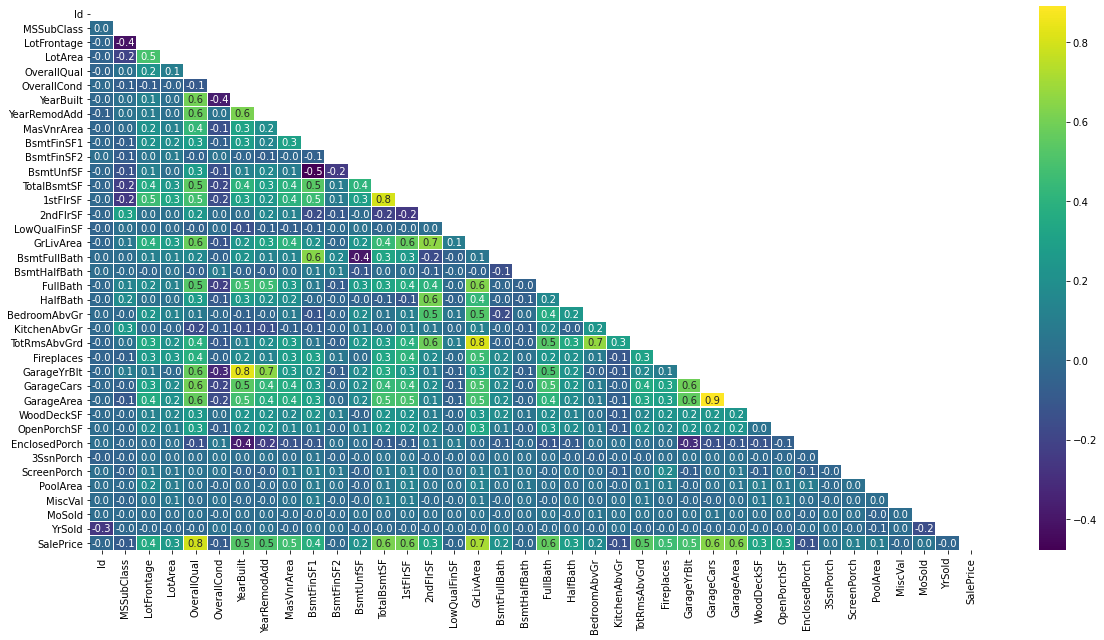

[]

In [12]:
drop_list = high_correlated_cols(df,plot = True)
drop_list

In [13]:
# PoolQC : Pool Quality
df["PoolQC"] = df["PoolArea"].fillna("None")

# MiscFeature : Various features not covered in other categories
df["MiscFeature"] = df["MiscFeature"].fillna("None")

# Alley : Alley access type
df["Alley"] = df["Alley"].fillna("None")

# Fence : Fence quality
df["Fence"] = df["Fence"].fillna("None")

# FireplaceQu : Fireplace quality
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    print(f"{col} : {df[col].dtype}")

#GarageType: Garage location
#GarageFinish: Garage interior finish
#GarageQual: Garage quality
#GarageCond: Garage status

for col in ["GarageType","GarageFinish","GarageQual","GarageCond"]:
    print(f"{col} : {df[col].dtype}")
    df[col] = df[col].fillna("None")
    
#BsmtFinType1: Quality of basement finished area
#BsmtFinType2: Quality of the second finished field (if any)
#BsmtQual: The height of the basement
#BsmtCond: General condition of the basement
#BsmtExposure: Walk-out or garden level basement walls

for col in ["BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond","BsmtExposure"]:
    print(f"{col} : {df[col].dtype}")
    df[col] = df[col].fillna("None")

PoolQC : int64
MiscFeature : object
Alley : object
Fence : object
FireplaceQu : object
GarageType : object
GarageFinish : object
GarageQual : object
GarageCond : object
BsmtFinType1 : object
BsmtFinType2 : object
BsmtQual : object
BsmtCond : object
BsmtExposure : object


In [14]:
#GarageYrBlt: The year the garage was built
#GarageArea: The size of the garage in square meters
#GarageCars: The size of the garage in terms of vehicle capacity

for col in ["GarageYrBlt","GarageArea","GarageCars"]:
    print(f"{col} : {df[col].dtype}")
    df[col] = df[col].fillna(0)
    

#BsmtFinSF1: Type 1 finished square feet
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square foot basement space
#TotalBsmtSF: Total square meters of basement area
#BsmtFullBath: Basement bathrooms
#BsmtHalfBath: Basement half baths
    
for col in ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]:
    print(f"{col} : {df[col].dtype}")
    df[col] = df[col].fillna(0)

GarageYrBlt : float64
GarageArea : float64
GarageCars : float64
BsmtFinSF1 : float64
BsmtFinSF2 : float64
BsmtUnfSF : float64
TotalBsmtSF : float64
BsmtFullBath : float64
BsmtHalfBath : float64


In [15]:
#MasVnrType: Wall cladding type
#MasVnrArea: Wall covering area in square meters

df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

for col in ["MasVnrType","MasVnrArea"]:
    print(f"{col} : {df[col].dtype}") 

MasVnrType : object
MasVnrArea : float64


In [16]:
# Functional : Home functionality degree
df["Functional"] = df["Functional"].fillna(df["Functional"].mode()[0])

# Electrical : Electrical System
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

# KitchenQual
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])

#Exterior1st: The exterior of the house
#Exterior2nd: House siding
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["Exterior2nd"] = df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0])

#SaleType : Sales status
df["SaleType"] = df["SaleType"].fillna(df["SaleType"].mode()[0])

# Utilities
df["Utilities"] = df["Utilities"].fillna(df["Utilities"].mode()[0])

for col in ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual','SaleType', 'Utilities']:
    print(f"{col} : {df[col].dtype}")

Electrical : object
Exterior1st : object
Exterior2nd : object
Functional : object
KitchenQual : object
SaleType : object
Utilities : object


In [17]:
# LotFrontage : Linear feet of the street connected to the property

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [18]:
# MSZoning: General zoning classification
#MSSubClass: Building class

df["MSZoning"] = df.groupby("MSSubClass")["MSZoning"].transform(lambda x : x.fillna(x.mode()[0]))

In [19]:
df[["MSSubClass","YrSold","MoSold"]].head()

MSSubClass  YrSold  MoSold
0          60    2008       2
1          20    2007       5
2          60    2008       9
3          70    2006       2
4          60    2008      12

In [20]:
for col in ["MSSubClass","YrSold","MoSold"]:
    print(f"{col} : {df[col].dtype}")
    df[col] = df[col].astype(str)

MSSubClass : int64
YrSold : int64
MoSold : int64


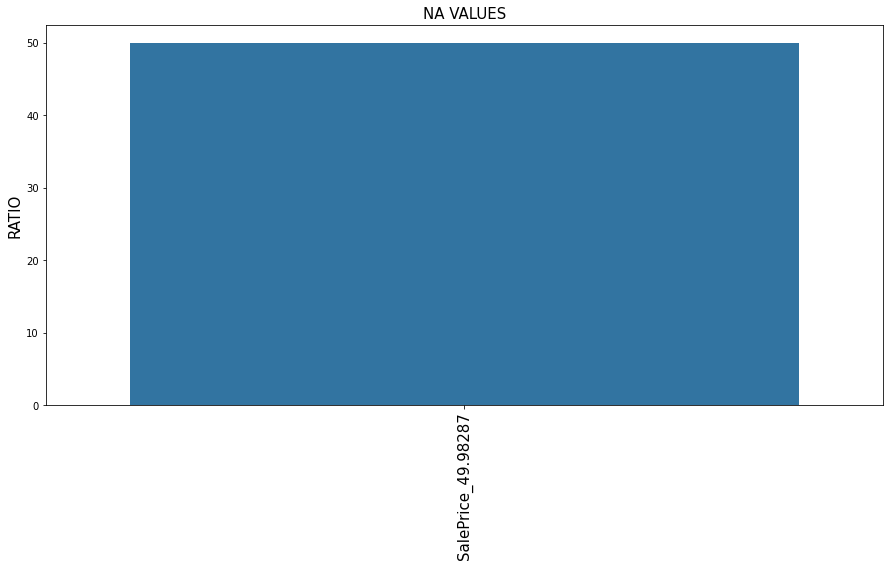

NA_Values   Ratio
SalePrice       1459 49.9829

In [21]:
na_values(df,plot = True)

In [22]:
cat_cols,num_cols,cat_but_car = grab_col_names(df, details= True)

Observations : 2919
Variables : 81
Cat Cols : 53
Num Cols : 27
Cat But Car : 1
Num But Cat : 9


In [23]:
def rare_encoder(dataframe, rare_perc, cat_cols):
    """
    
    Object sınıfı alınıyor unutma !!!!
    
    """
    
    temp_df = dataframe.copy()
    
    rare_columns = [col for col in cat_cols if temp_df[col].dtype == "object" 
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis = None)]
    
    #rare_columns = [col for col in cat_cols \
    #                    if (temp_df[col].value_counts() / len(temp_df) < 0.01).sum() > 1]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels) , "Rare" , temp_df[var])
    
    return temp_df

In [24]:
def boxplot_cat(dataframe , cat_cols, target ):
    
    i = 1
    plt.figure(figsize = (30,100))
    
    for col in cat_cols:
        plt.subplot(18,3,i)
        
        order = dataframe.groupby(col)[target].median().sort_values(ascending = False)
        sns.boxplot(x = dataframe[col], y = dataframe[target], order = order.index)
        plt.xticks(rotation = 45,fontsize = 15)
        plt.xlabel(col,fontsize = 15)
        plt.ylabel("SalePrice", fontsize = 15)
        i+=1
        plt.tight_layout()
        
    plt.show()

In [25]:
def scatterplot_num(dataframe , num_cols, target):
    
    i = 1
    plt.figure(figsize = (30,80))
    size = 20
    
    for num in num_cols:
        plt.subplot(15,3,i)
        sns.scatterplot(x = dataframe[num], y = dataframe[target])
        plt.xticks(rotation = 45, fontsize = size)
        plt.xlabel(num, fontsize = size)
        plt.ylabel(target, fontsize = size)
        plt.tight_layout()
        
        i+=1
    plt.show()
        

In [26]:
def dtypes_nunique(dataframe):
    data = pd.DataFrame()
    data["Name"] = [col for col in dataframe.columns]
    data["Dtype"] = [dataframe[col].dtype for col in dataframe.columns]
    data["Nunique"] = [dataframe[col].nunique() for col in dataframe.columns]
    data = data.set_index("Name")
    data = data.T
    return data

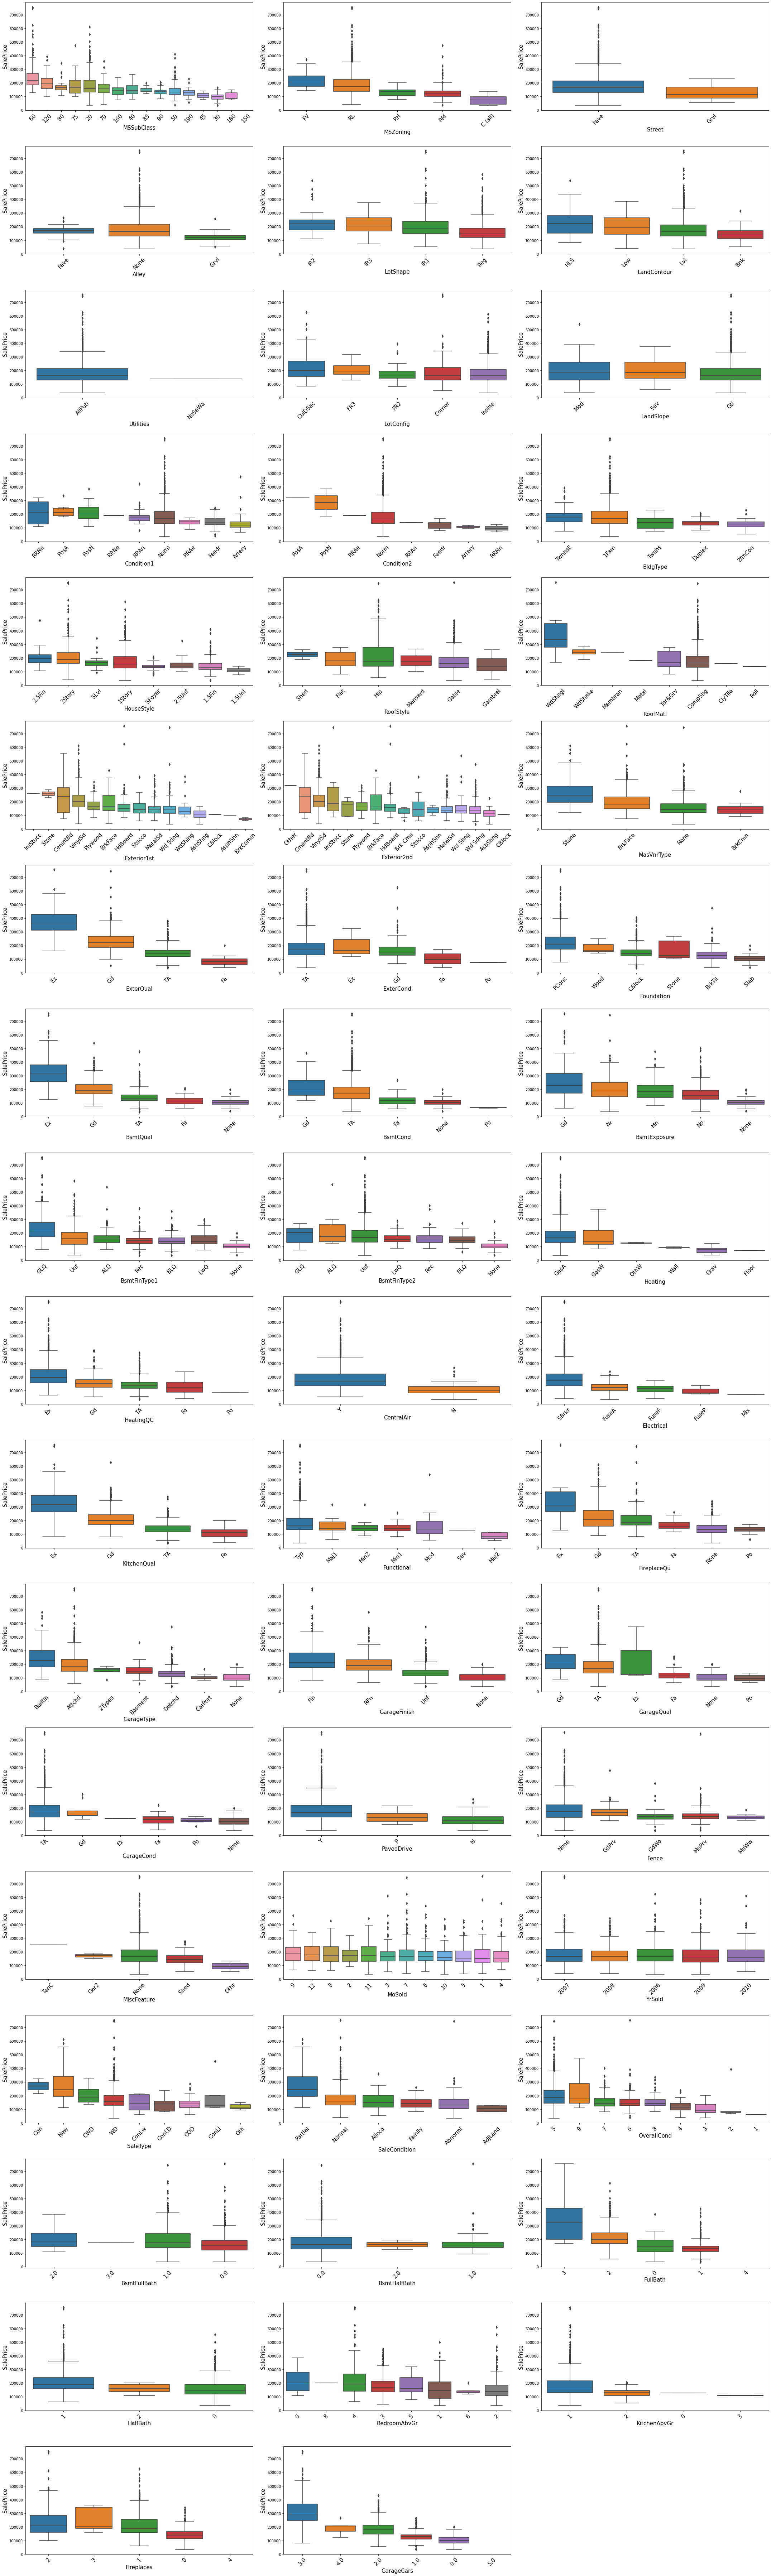

In [27]:
boxplot_cat(df, cat_cols, "SalePrice")

In [28]:
rare_analyser(df,"SalePrice" ,cat_cols)

FOR MSSUBCLASS : 16

     COUNT  RATIO  TARGET_MEAN
60     575 0.1970  239948.5017
120    182 0.0624  200779.0805
75      23 0.0079  192437.5000
20    1079 0.3696  185224.8116
80     118 0.0404  169736.5517
70     128 0.0439  166772.4167
40       6 0.0021  156125.0000
85      48 0.0164  147810.0000
50     287 0.0983  143302.9722
160    128 0.0439  138647.3810
90     109 0.0373  133541.0769
190     61 0.0209  129613.3333
45      18 0.0062  108591.6667
180     17 0.0058  102300.0000
30     139 0.0476   95829.7246
150      1 0.0003          NaN

FOR MSZONING : 5

         COUNT  RATIO  TARGET_MEAN
FV         139 0.0476  214014.0615
RL        2267 0.7766  191004.9948
RH          26 0.0089  131558.3750
RM         462 0.1583  126316.8303
C (all)     25 0.0086   74528.0000

FOR STREET : 2

      COUNT  RATIO  TARGET_MEAN
Pave   2907 0.9959  181130.5385
Grvl     12 0.0041  130190.5000

FOR ALLEY : 3

      COUNT  RATIO  TARGET_MEAN
None   2721 0.9322  183452.1315
Pave     78 0.0267  168000.585

   COUNT  RATIO  TARGET_MEAN
1   2785 0.9541  183388.7902
2    129 0.0442  131096.1538
0      3 0.0010  127500.0000
3      2 0.0007  109500.0000

FOR FIREPLACES : 5

   COUNT  RATIO  TARGET_MEAN
3     11 0.0038  252000.0000
2    219 0.0750  240588.5391
1   1268 0.4344  211843.9092
0   1420 0.4865  141331.4826
4      1 0.0003          NaN

FOR GARAGECARS : 6

        COUNT  RATIO  TARGET_MEAN
3.0000    374 0.1281  309636.1215
4.0000     16 0.0055  192655.8000
2.0000   1594 0.5461  183851.6638
1.0000    776 0.2658  128116.6883
0.0000    158 0.0541  103317.2840
5.0000      1 0.0003          NaN



In [29]:
dictionary = \
{"MSZoning" : {"FV" : 3 ,"RL": 3 ,"RH": 2 , "RM": 2, "C (all)" : 1 },
 "LotShape" : {"IR2": 3, "IR3": 3, "IR1": 2, "Reg": 1},
 "LandContour" : {"HLS": 4,"Low": 3,"Lvl": 2,"Bnk": 1},
 "Electrical" : {"Mix" : 1, "FuseP" : 1, "FuseF" : 1, "FuseA" :2, "SBrkr" : 3},
 "LotConfig" : {"CulDSac" : 3, "FR3" : 3 , "Corner" : 2 ,"FR2" : 1,"Inside" : 1} ,
 "LandSlope" : {"Sev" : 2, "Mod" : 2,"Gtl" : 1 },
 "BldgType" : {"1Fam" : 2, "TwnhsE" : 2, "Twnhs" : 1, "Duplex": 1, "2fmCon": 1},
 "RoofStyle" : {"Shed" : 4, "Hip" : 4, "Flat" : 3,"Mansard" : 2, "Gable" : 2,"Gambrel" : 1 },
 "RoofMatl" : {"WdShngl" : 4, "Membran" : 3,"WdShake" : 3, "Tar&Grv" : 2 , "Metal" : 2, "CompShg": 2,"ClyTile" : 1,"Roll" : 1},
 "MasVnrType" : {"Stone" : 3, "BrkFace": 2, "None" : 1, "BrkCmn" : 1},
 "ExterQual" :  {"Ex" : 4, "Gd" : 3, "TA" : 2, "Fa" : 1},
 "ExterCond" : {"Ex" : 5, "TA" : 4, "Gd" : 3, "Fa" : 2, "Po" : 1},
 "Foundation" : {"PConc" : 5, "Wood" : 4, "Stone" : 4,"CBlock" : 3, "BrkTil" : 2, "Slab" : 1}, 
 "BsmtQual" : {'None': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 "BsmtCond" : {'Po': 1, 'None': 2, 'Fa': 3, 'TA': 4, 'Gd': 5},
 "BsmtExposure" : {"Gd": 5 , "Av" : 4, "Mn" : 3, "No" : 2, "None" : 1},
 "BsmtFinType1" : {'None': 1, 'Rec': 2,'BLQ': 2 ,'LwQ': 2,'ALQ': 3,'Unf': 4,'GLQ': 5 },
 "BsmtFinType2" : {"None" : 1, "BLQ" : 2,"LwQ" : 2,"Rec" : 2, "GLQ" : 3,"Unf" : 3,"ALQ" : 4},
 "Heating" : {"GasA" : 5, "GasW" : 4, "OthW" : 3, "Wall" : 2, "Grav" : 1,"Floor" : 1},
 "HeatingQC" : {"Ex" : 4, "Gd" : 3, "TA" : 3,"Fa" : 2, "Po" : 1},
 "CentralAir" : {"Y" : 1, "N" : 0},
 "KitchenQual" : {"Ex" : 4, "Gd" : 3 , "TA" : 2,"Fa" :1},
 "FireplaceQu" : {"Ex" : 6, "Gd" : 5,"TA" : 4, "Fa" : 3,"None" : 2,"Po":1},
 "GarageType" : {"BuiltIn" : 5, "Attchd" : 4, "Basment" : 3, "2Types" : 3, "Detchd" : 2 ,"CarPort" : 1,"None" : 1},
 "GarageFinish" : {"Fin" : 4,"RFn" : 3,"Unf" : 2,"None" : 1},
 "GarageQual" : {"Ex" : 5,"Gd" : 4,"TA" : 3,"Fa" : 2,"None" : 1,"Po" :1 },
 "GarageCond" : {"TA" : 5,"Gd" : 4,"Ex" : 3,"Fa" : 2,"Po" : 1,"None" : 1 },
 "PavedDrive" : {"Y" : 3 , "P" : 2, "N" : 1},
 "Fence" : {"None" : 2, "GdPrv" : 2,"MnPrv" : 1,"GdWo" : 1,"MnWw" : 1},
 "Condition1" : {"PosA":7, "PosN":7, "RRNn":6, "RRNe":5, "Norm":4 ,"RRAn":3 ,"Feedr":2 ,"RRAe":1,"Artery":1},
 "Condition2" : {"PosA":7, "PosN":6, "RRAe":5, "Norm":4, "RRAn":3 ,"Feedr":3 ,"Artery":2 ,"RRNn":1},
 
 "Neighborhood" : { 'MeadowV': 1,'IDOTRR': 1,'BrDale': 1,
                    'BrkSide': 2,'OldTown': 2,'Edwards': 2,
                    'Sawyer': 3,'Blueste': 3,'SWISU': 3,'NPkVill': 3,'NAmes': 3,
                    'Mitchel': 4,
                    'SawyerW': 5,'NWAmes': 5,'Gilbert': 5,'Blmngtn': 5,'CollgCr': 5,
                    'ClearCr': 6,'Crawfor': 6,
                    'Veenker': 7,'Somerst': 7,
                    'Timber': 8,
                    'StoneBr': 9,
                    'NridgHt': 10,'NoRidge': 10}
} 

In [30]:
orders = ["MSZoning",  "LotShape", "LandContour", "LotConfig", "LandSlope","Electrical" ,
         "BldgType", "RoofStyle", "RoofMatl", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
         "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", 
         "HeatingQC","CentralAir", "KitchenQual", "FireplaceQu", "Condition1","Condition2",
         "GarageQual", "GarageCond", "PavedDrive", "Fence" , "Neighborhood" ,"GarageType", "GarageFinish"]

In [31]:
for col in orders:
    df[col] = df[col].map(dictionary[col]).astype(int)

In [32]:
# Having Feature

df["HasPool"] = df["PoolArea"].apply(lambda x : 1 if x > 0 else 0)
df["HasGarage"] = df["GarageCars"].apply(lambda x : 1 if x > 0 else 0)
df["HasFirePlace"] = df["Fireplaces"].apply(lambda x : 1 if x > 0 else 0)
df["Has2ndFloor"] = df["2ndFlrSF"].apply(lambda x : 1 if x > 0 else 0)
df["HasBsmt"] = df["TotalBsmtSF"].apply(lambda x : 1 if x > 0 else 0 )


#Another Feature

df["GarageCarSize"] = df["GarageArea"] / df["GarageCars"]

df["HomeRepairYear"] = df["YearRemodAdd"] - df["YearBuilt"]

df["TotalSF"] = df["BsmtFinSF1"] + df["BsmtFinSF2"] + df["1stFlrSF"] + df["2ndFlrSF"]

df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"]+
                                       df["FullBath"] +
                                       df["HalfBath"] + 
                                       df["KitchenAbvGr"])

df["TotalPorchSF"] = (df["OpenPorchSF"] + df["3SsnPorch"] + 
                      df["EnclosedPorch"] + df["ScreenPorch"] + df["WoodDeckSF"])

df["TotalBathrooms"] = (df["FullBath"] + (0.5*df["HalfBath"])) + df["BsmtFullBath"] + (0.5*df["BsmtHalfBath"])

# Score

df["ConditionScore"] = df["Condition1"] + df["Condition2"]

df["GarageScore"] = df["GarageCond"] + df["GarageQual"]

df["TotalHomeScore"] = df["OverallCond"] + df["OverallQual"]

df["ExterScore"] = df["ExterCond"] + df["ExterQual"]

df["TotalBsmScore"] = df["BsmtCond"] + df["BsmtQual"] + df["BsmtFinType1"] + df["BsmtFinType2"]

df['TotalQual'] = df['OverallQual'] + df['ExterCond'] + \
                  df['TotalBsmScore'] + df['GarageScore'] + \
                  df['ConditionScore'] + df["KitchenQual"] + df['HeatingQC']
        
###

df["QualGr"] = df["TotalQual"] * df["GrLivArea"]

In [33]:
na_values(df)

NA_Values   Ratio
SalePrice           1459 49.9829
GarageCarSize        158  5.4128

In [34]:
df["GarageCarSize"] = df["GarageCarSize"].fillna(0)
na_values(df)

NA_Values   Ratio
SalePrice       1459 49.9829

In [35]:
df_new = df.copy()
df = df_new.copy()

In [36]:
new_features = ["TotalBsmScore","ExterScore","TotalHomeScore","GarageScore","ConditionScore",
                "TotalBathrooms","TotalPorchSF","SqFtPerRoom","TotalSF","HomeRepairYear","GarageCarSize",
                "HasPool","HasGarage","HasFirePlace","Has2ndFloor","HasBsmt","TotalQual","QualGr"]

print(len(new_features))
dtypes_nunique(df[new_features])

18


Name    TotalBsmScore ExterScore TotalHomeScore GarageScore ConditionScore TotalBathrooms TotalPorchSF SqFtPerRoom  TotalSF HomeRepairYear GarageCarSize HasPool HasGarage HasFirePlace Has2ndFloor  \
Dtype           int64      int64          int64       int64          int64        float64        int64     float64  float64          int64       float64   int64     int64        int64       int64   
Nunique            11          8             17           8             11             11          535        1740     1637            117           530       2         2            2           2   

Name    HasBsmt TotalQual QualGr  
Dtype     int64     int64  int64  
Nunique       2        40   2421

In [37]:
print("Old Num Cols : \n\n", num_cols,end =  "\n\n")
print("Old Cat Cols : \n\n ", cat_cols,end =  "\n\n")
print("Old Cat But Car : \n\n ", cat_but_car,end =  "\n\n")

Old Num Cols : 

 ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice']

Old Cat Cols : 

  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'OverallC

In [38]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,details = True)

Observations : 2919
Variables : 99
Cat Cols : 60
Num Cols : 39
Cat But Car : 0
Num But Cat : 47


In [39]:
print("Num Cols : \n\n", num_cols,end =  "\n\n")
print("Cat Cols : \n\n ", cat_cols,end =  "\n\n")
print("Cat But Car : \n\n ", cat_but_car,end =  "\n\n")

Num Cols : 

 ['Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice', 'GarageCarSize', 'HomeRepairYear', 'TotalSF', 'SqFtPerRoom', 'TotalPorchSF', 'TotalBathrooms', 'ConditionScore', 'TotalHomeScore', 'TotalBsmScore', 'TotalQual', 'QualGr']

Cat Cols : 

  ['MSSubClass', 'Street', 'Alley', 'Utilities', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'Functional', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

In [40]:
dtypes_nunique(df[num_cols])

Name        Id LotFrontage LotArea Neighborhood OverallQual YearBuilt YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea TotRmsAbvGrd  \
Dtype    int64     float64   int64        int64       int64     int64        int64    float64    float64    float64   float64     float64    int64    int64        int64     int64        int64   
Nunique   2919         130    1951           10          10       118           61        444        991        272      1135        1058     1083      635           36      1292           14   

Name    GarageYrBlt GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea PoolQC MiscVal SalePrice GarageCarSize HomeRepairYear  TotalSF SqFtPerRoom TotalPorchSF  \
Dtype       float64    float64      int64       int64         int64     int64       int64    int64  int64   int64   float64       float64          int64  float64     float64        int64   
Nunique         104        603        379         252           183        31         121       14     14      38       663           530            117     1637        1740          535   

Name    TotalBathrooms ConditionScore TotalHomeScore TotalBsmScore TotalQual QualGr  
Dtype          float64          int64          int64         int64     int64  int64  
Nunique             11             11             17            11        40   2421

In [41]:
dtypes_nunique(df[cat_cols])

Name    MSSubClass  Street   Alley Utilities HouseStyle Exterior1st Exterior2nd Functional MiscFeature  MoSold  YrSold SaleType SaleCondition MSZoning LotShape LandContour LotConfig LandSlope  \
Dtype       object  object  object    object     object      object      object     object      object  object  object   object        object    int64    int64       int64     int64     int64   
Nunique         16       2       3         2          8          15          16          7           5      12       5        9             6        3        3           4         3         2   

Name    Condition1 Condition2 BldgType OverallCond RoofStyle RoofMatl MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
Dtype        int64      int64    int64       int64     int64    int64      int64     int64     int64      int64    int64    int64        int64        int64        int64   int64     int64      int64   
Nunique          7          7        2           9         4        4          3         4         5          5        5        5            5            5            4       5         4          2   

Name    Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual Fireplaces FireplaceQu GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive  \
Dtype        int64      float64      float64    int64    int64        int64        int64       int64      int64       int64      int64        int64    float64      int64      int64      int64   
Nunique          3            4            3        5        3            8            4           4          5           6          5            4          6          5          5          3   

Name     Fence HasPool HasGarage HasFirePlace Has2ndFloor HasBsmt GarageScore ExterScore  
Dtype    int64   int64     int64        int64       int64   int64       int64      int64  
Nunique      2       2         2            2           2       2           8          8

In [42]:
df = rare_encoder(df,0.01,cat_cols)

In [43]:
for col in cat_cols:
    if df[col].dtype == "object":
        label_encoder(df,col)

In [44]:
dtypes_nunique(df[cat_cols])

Name    MSSubClass Street  Alley Utilities HouseStyle Exterior1st Exterior2nd Functional MiscFeature MoSold YrSold SaleType SaleCondition MSZoning LotShape LandContour LotConfig LandSlope  \
Dtype        int64  int64  int64     int64      int64       int64       int64      int64       int64  int64  int64    int64         int64    int64    int64       int64     int64     int64   
Nunique         12      2      3         2          6          11          11          5           3     12      5        4             5        3        3           4         3         2   

Name    Condition1 Condition2 BldgType OverallCond RoofStyle RoofMatl MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
Dtype        int64      int64    int64       int64     int64    int64      int64     int64     int64      int64    int64    int64        int64        int64        int64   int64     int64      int64   
Nunique          7          7        2           9         4        4          3         4         5          5        5        5            5            5            4       5         4          2   

Name    Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual Fireplaces FireplaceQu GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive  \
Dtype        int64      float64      float64    int64    int64        int64        int64       int64      int64       int64      int64        int64    float64      int64      int64      int64   
Nunique          3            4            3        5        3            8            4           4          5           6          5            4          6          5          5          3   

Name     Fence HasPool HasGarage HasFirePlace Has2ndFloor HasBsmt GarageScore ExterScore  
Dtype    int64   int64     int64        int64       int64   int64       int64      int64  
Nunique      2       2         2            2           2       2           8          8

In [45]:
(df.dtypes == "object").sum()

0

In [46]:
useless_columns = [col for col in cat_cols if df[col].nunique() == 1 or 
                   (df[col].nunique() == 2 and (df[col].value_counts() / len(df) <= 0.01).any(axis = None))]

In [47]:
useless_columns

['Street', 'Utilities', 'HasPool']

In [48]:
for col in useless_columns:
    df.drop(col, axis = 1 ,inplace = True)

In [49]:
cat_cols = [col for col in cat_cols if col not in useless_columns]
len(cat_cols)

57

In [50]:
##################
# One-Hot Encoding
##################

In [51]:
def select_one_columns(dtypes_nunique_):
    
    dtypes_nunique_ = dtypes_nunique_.T.Nunique
    dtypes_nunique_ = dtypes_nunique_[dtypes_nunique_ <= 5].index.tolist()
    return dtypes_nunique_

one_columns = select_one_columns(dtypes_nunique(df))
len(one_columns)

44

In [52]:
df = one_hot_encoder(dataframe=df, categorical_cols=one_columns,drop_first=True)

In [53]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  Condition2  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  Exterior2nd  MasVnrArea  BsmtFinSF1  \
0   1           6      65.0000     8450             5           4           4           2            7            5       2003          2003            8            8    196.0000    706.0000   
1   2           3      80.0000     9600             7           2           4           1            6            8       1976          1976            4            4      0.0000    978.0000   
2   3           6      68.0000    11250             5           4           4           2            7            5       2001          2002            8            8    162.0000    486.0000   
3   4           7      60.0000     9550             6           4           4           2            7            5       1915          1970            9           10      0.0000    216.0000   
4   5           6      84.0000    14260            10           4           4           2            8            5       2000          2000            8            8    350.0000    655.0000   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0      0.0000   150.0000     856.0000       856       854             0       1710             3             8            2    2003.0000      2.0000    548.0000           0           61   
1      0.0000   284.0000    1262.0000      1262         0             0       1262             3             6            4    1976.0000      2.0000    460.0000         298            0   
2      0.0000   434.0000     920.0000       920       866             0       1786             3             6            4    2001.0000      2.0000    608.0000           0           42   
3      0.0000   540.0000     756.0000       961       756             0       1717             3             7            5    1998.0000      3.0000    642.0000           0           35   
4      0.0000   490.0000    1145.0000      1145      1053             0       2198             4             9            4    2000.0000      3.0000    836.0000         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold   SalePrice  GarageCarSize  HomeRepairYear   TotalSF  SqFtPerRoom  TotalPorchSF  TotalBathrooms  ConditionScore  \
0              0          0            0         0       0        0       4 208500.0000       274.0000               0 2416.0000     142.5000            61          3.5000               8   
1              0          0            0         0       0        0       7 181500.0000       230.0000               0 2240.0000     140.2222           298          2.5000               6   
2              0          0            0         0       0        0      11 223500.0000       304.0000               1 2272.0000     178.6000            42          3.5000               8   
3            272          0            0         0       0        0       4 140000.0000       214.0000              55 1933.0000     190.7778           307          2.0000               8   
4              0          0            0         0       0        0       3 250000.0000       278.6667               0 2853.0000     169.0769           276          3.5000               8   

   GarageScore  TotalHomeScore  ExterScore  TotalBsmScore  TotalQual  QualGr  MSZoning_2  MSZoning_3  Alley_1  Alley_2  LotShape_2  LotShape_3  LandContour_2  LandContour_3  LandContour_4  \
0            8              12           7             16         50   85500           0           1        1        0           0           0              1              0              0   
1            8              14           6             14         44   55528           0           1        1        0           0           0              1              0  

In [54]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,details = True)

Observations : 2919
Variables : 173
Cat Cols : 130
Num Cols : 43
Cat But Car : 0
Num But Cat : 130


In [55]:
print("Num Cols : \n\n", num_cols,end =  "\n\n")
print("Cat Cols : \n\n ", cat_cols,end =  "\n\n")
print("Cat But Car : \n\n ", cat_but_car,end =  "\n\n")

Num Cols : 

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'SalePrice', 'GarageCarSize', 'HomeRepairYear', 'TotalSF', 'SqFtPerRoom', 'TotalPorchSF', 'TotalBathrooms', 'ConditionScore', 'TotalHomeScore', 'TotalBsmScore', 'TotalQual', 'QualGr']

Cat Cols : 

  ['Condition1', 'Condition2', 'HouseStyle', 'OverallCond', 'BedroomAbvGr', 'FireplaceQu', 'GarageCars', 'GarageScore', 'ExterScore', 'MSZoning_2', 'MSZoning_3', 'Alley_1', 'Alley_2', 'LotShape_2', 'LotShape_3', 'LandContour_2', 'LandContour_3', 'LandContour_4', 'LotConfig_2', 'LotConfig_3', 'LandSlope_2', 'BldgType_2', 'RoofStyle_2', 'RoofStyle_3', 'RoofStyle_4',

In [56]:
dtypes_nunique(df[num_cols])

Name        Id MSSubClass LotFrontage LotArea Neighborhood OverallQual YearBuilt YearRemodAdd Exterior1st Exterior2nd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF  \
Dtype    int64      int64     float64   int64        int64       int64     int64        int64       int64       int64    float64    float64    float64   float64     float64    int64    int64   
Nunique   2919         12         130    1951           10          10       118           61          11          11        444        991        272      1135        1058     1083      635   

Name    LowQualFinSF GrLivArea TotRmsAbvGrd GarageYrBlt GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea PoolQC MiscVal MoSold SalePrice GarageCarSize HomeRepairYear  \
Dtype          int64     int64        int64     float64    float64      int64       int64         int64     int64       int64    int64  int64   int64  int64   float64       float64          int64   
Nunique           36      1292           14         104        603        379         252           183        31         121       14     14      38     12       663           530            117   

Name     TotalSF SqFtPerRoom TotalPorchSF TotalBathrooms ConditionScore TotalHomeScore TotalBsmScore TotalQual QualGr  
Dtype    float64     float64        int64        float64          int64          int64         int64     int64  int64  
Nunique     1637        1740          535             11             11             17            11        40   2421

In [57]:
useless_cols_new = [col for col in cat_cols if (df[col].value_counts() / len(df) <= 0.01).any(axis = None) ]
print(useless_cols_new)

['Condition1', 'Condition2', 'OverallCond', 'BedroomAbvGr', 'GarageCars', 'GarageScore', 'ExterScore', 'RoofStyle_3', 'RoofMatl_2', 'RoofMatl_3', 'RoofMatl_4', 'ExterCond_5', 'Foundation_4', 'Heating_2', 'Heating_3', 'Heating_4', 'BsmtFullBath_3.0', 'BsmtHalfBath_2.0', 'FullBath_4', 'HalfBath_2', 'KitchenAbvGr_3', 'Fireplaces_3', 'Fireplaces_4', 'GarageQual_4', 'GarageQual_5', 'GarageCond_3', 'GarageCond_4', 'MiscFeature_1']


In [58]:
#for col in useless_cols_new:
#    df.drop(col, axis = 1 , inplace = True)

In [59]:
##################
# Outliers
##################

In [60]:
na_values(df)

NA_Values   Ratio
SalePrice       1459 49.9829

In [61]:
edited_num_cols = [col for col in num_cols if col not in "Id"]
for col in edited_num_cols:
    print(f" {col.upper()} : {check_outliers(df, col)}")

 MSSUBCLASS : There Are Outliers
 LOTFRONTAGE : There Are Outliers
 LOTAREA : There Are Outliers
 NEIGHBORHOOD : There Are Outliers
 OVERALLQUAL : There Are Outliers
 YEARBUILT : There Are Outliers
 YEARREMODADD : There Are Not Outliers
 EXTERIOR1ST : There Are Not Outliers
 EXTERIOR2ND : There Are Not Outliers
 MASVNRAREA : There Are Outliers
 BSMTFINSF1 : There Are Outliers
 BSMTFINSF2 : There Are Outliers
 BSMTUNFSF : There Are Outliers
 TOTALBSMTSF : There Are Outliers
 1STFLRSF : There Are Outliers
 2NDFLRSF : There Are Outliers
 LOWQUALFINSF : There Are Outliers
 GRLIVAREA : There Are Outliers
 TOTRMSABVGRD : There Are Outliers
 GARAGEYRBLT : There Are Outliers
 GARAGEAREA : There Are Outliers
 WOODDECKSF : There Are Outliers
 OPENPORCHSF : There Are Outliers
 ENCLOSEDPORCH : There Are Outliers
 3SSNPORCH : There Are Outliers
 SCREENPORCH : There Are Outliers
 POOLAREA : There Are Outliers
 POOLQC : There Are Outliers
 MISCVAL : There Are Outliers
 MOSOLD : There Are Not Outliers

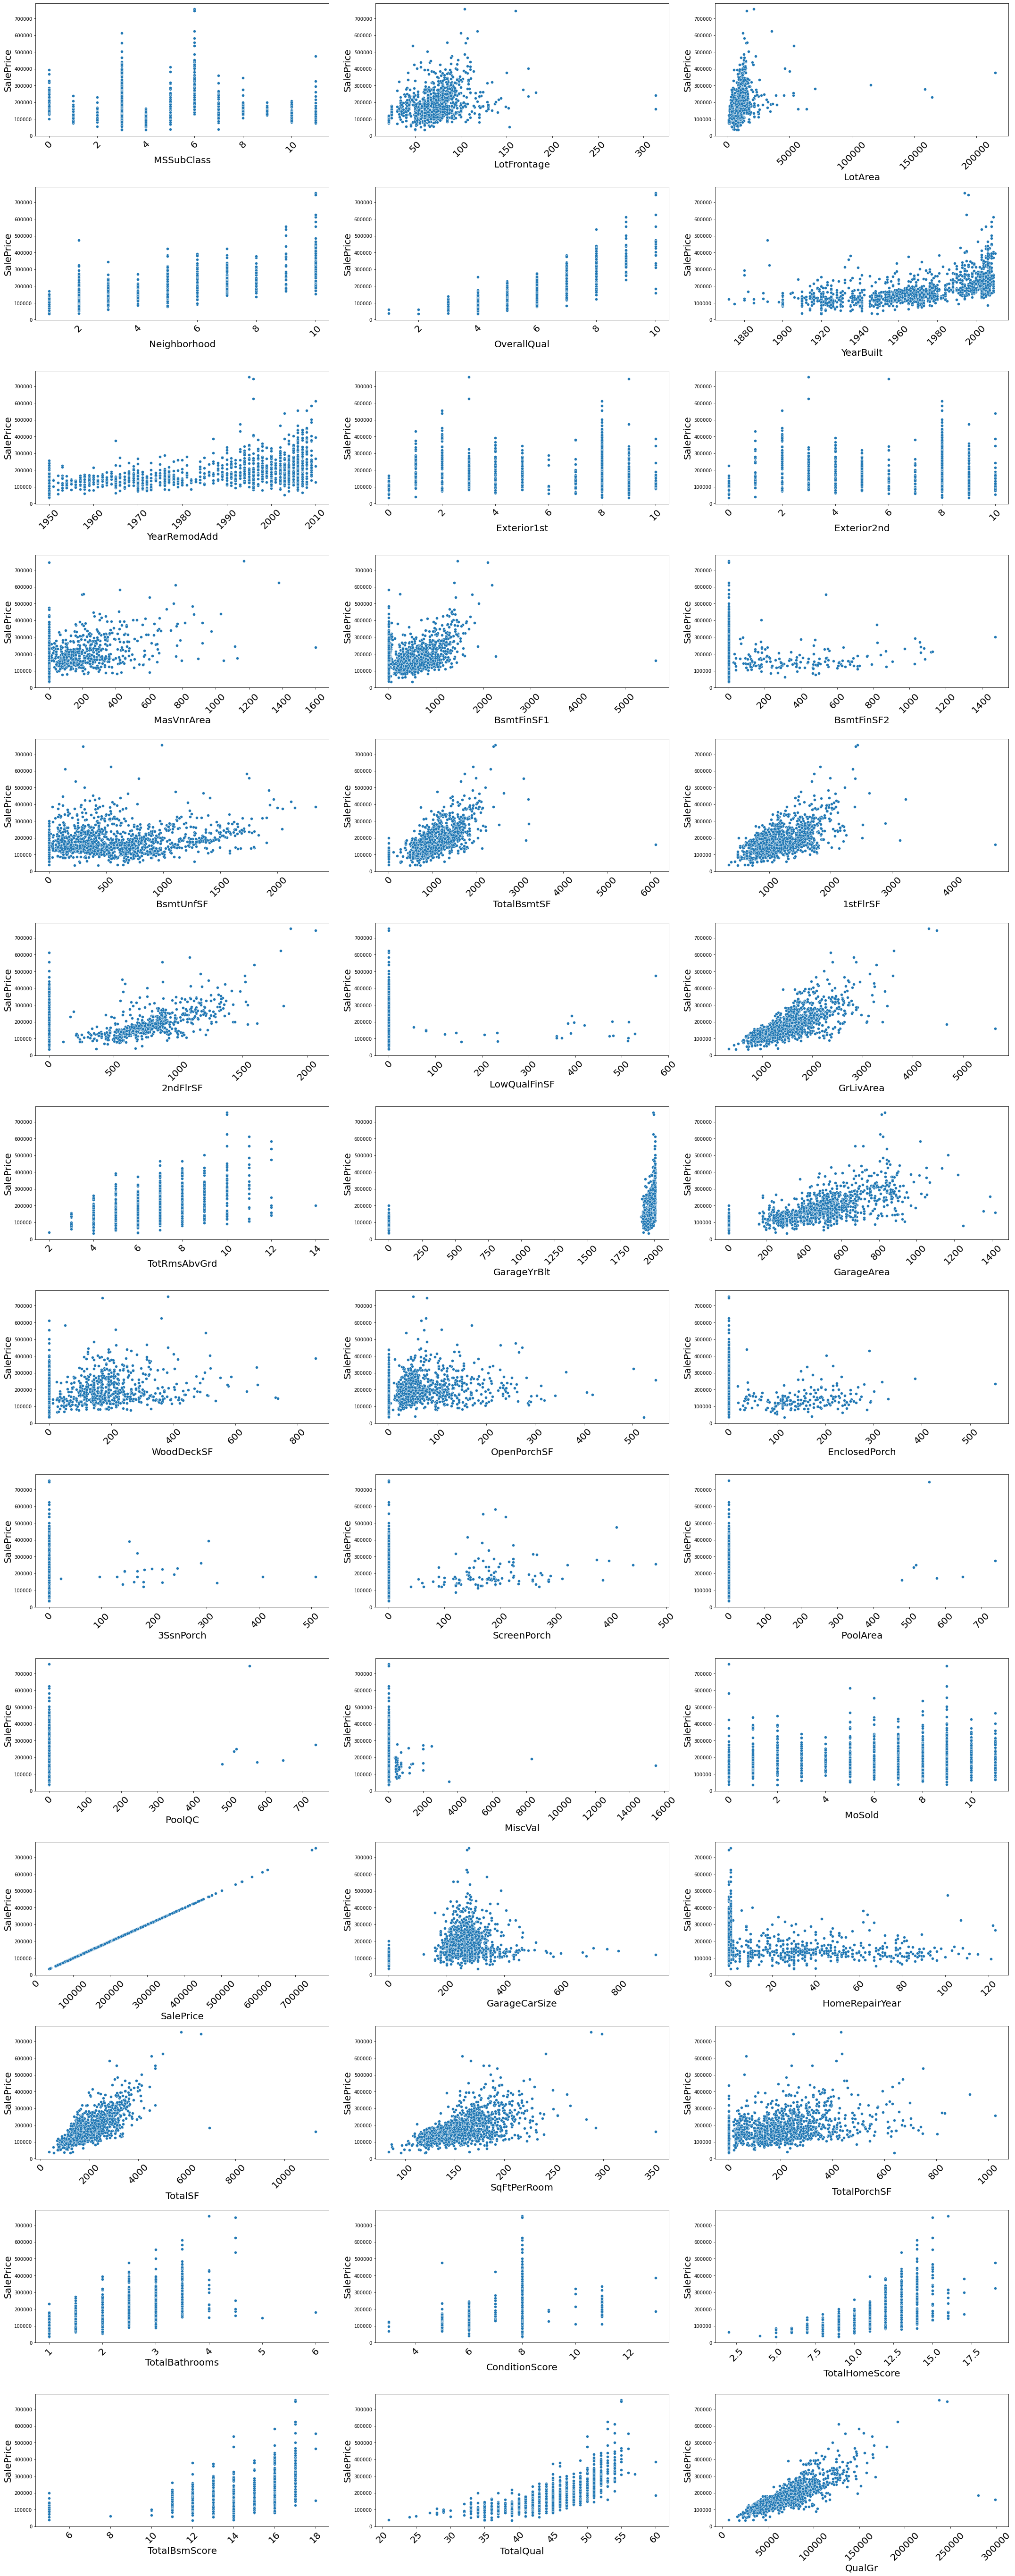

In [62]:
scatterplot_num(df, edited_num_cols, "SalePrice")

In [63]:
exclude = ['BsmtFinSF2',
           'LowQualFinSF',
           'EnclosedPorch',
           '3SsnPorch',
           'ScreenPorch',
           'PoolArea',
           'PoolQC',
           'MiscVal',
           'ConditionScore',
           'SalePrice']

In [64]:
for col in edited_num_cols:
    if col not in exclude:
        replace_with_thresholds(df, col)

In [65]:
(dtypes_nunique(df[edited_num_cols]).T.Nunique == 1).sum()

0

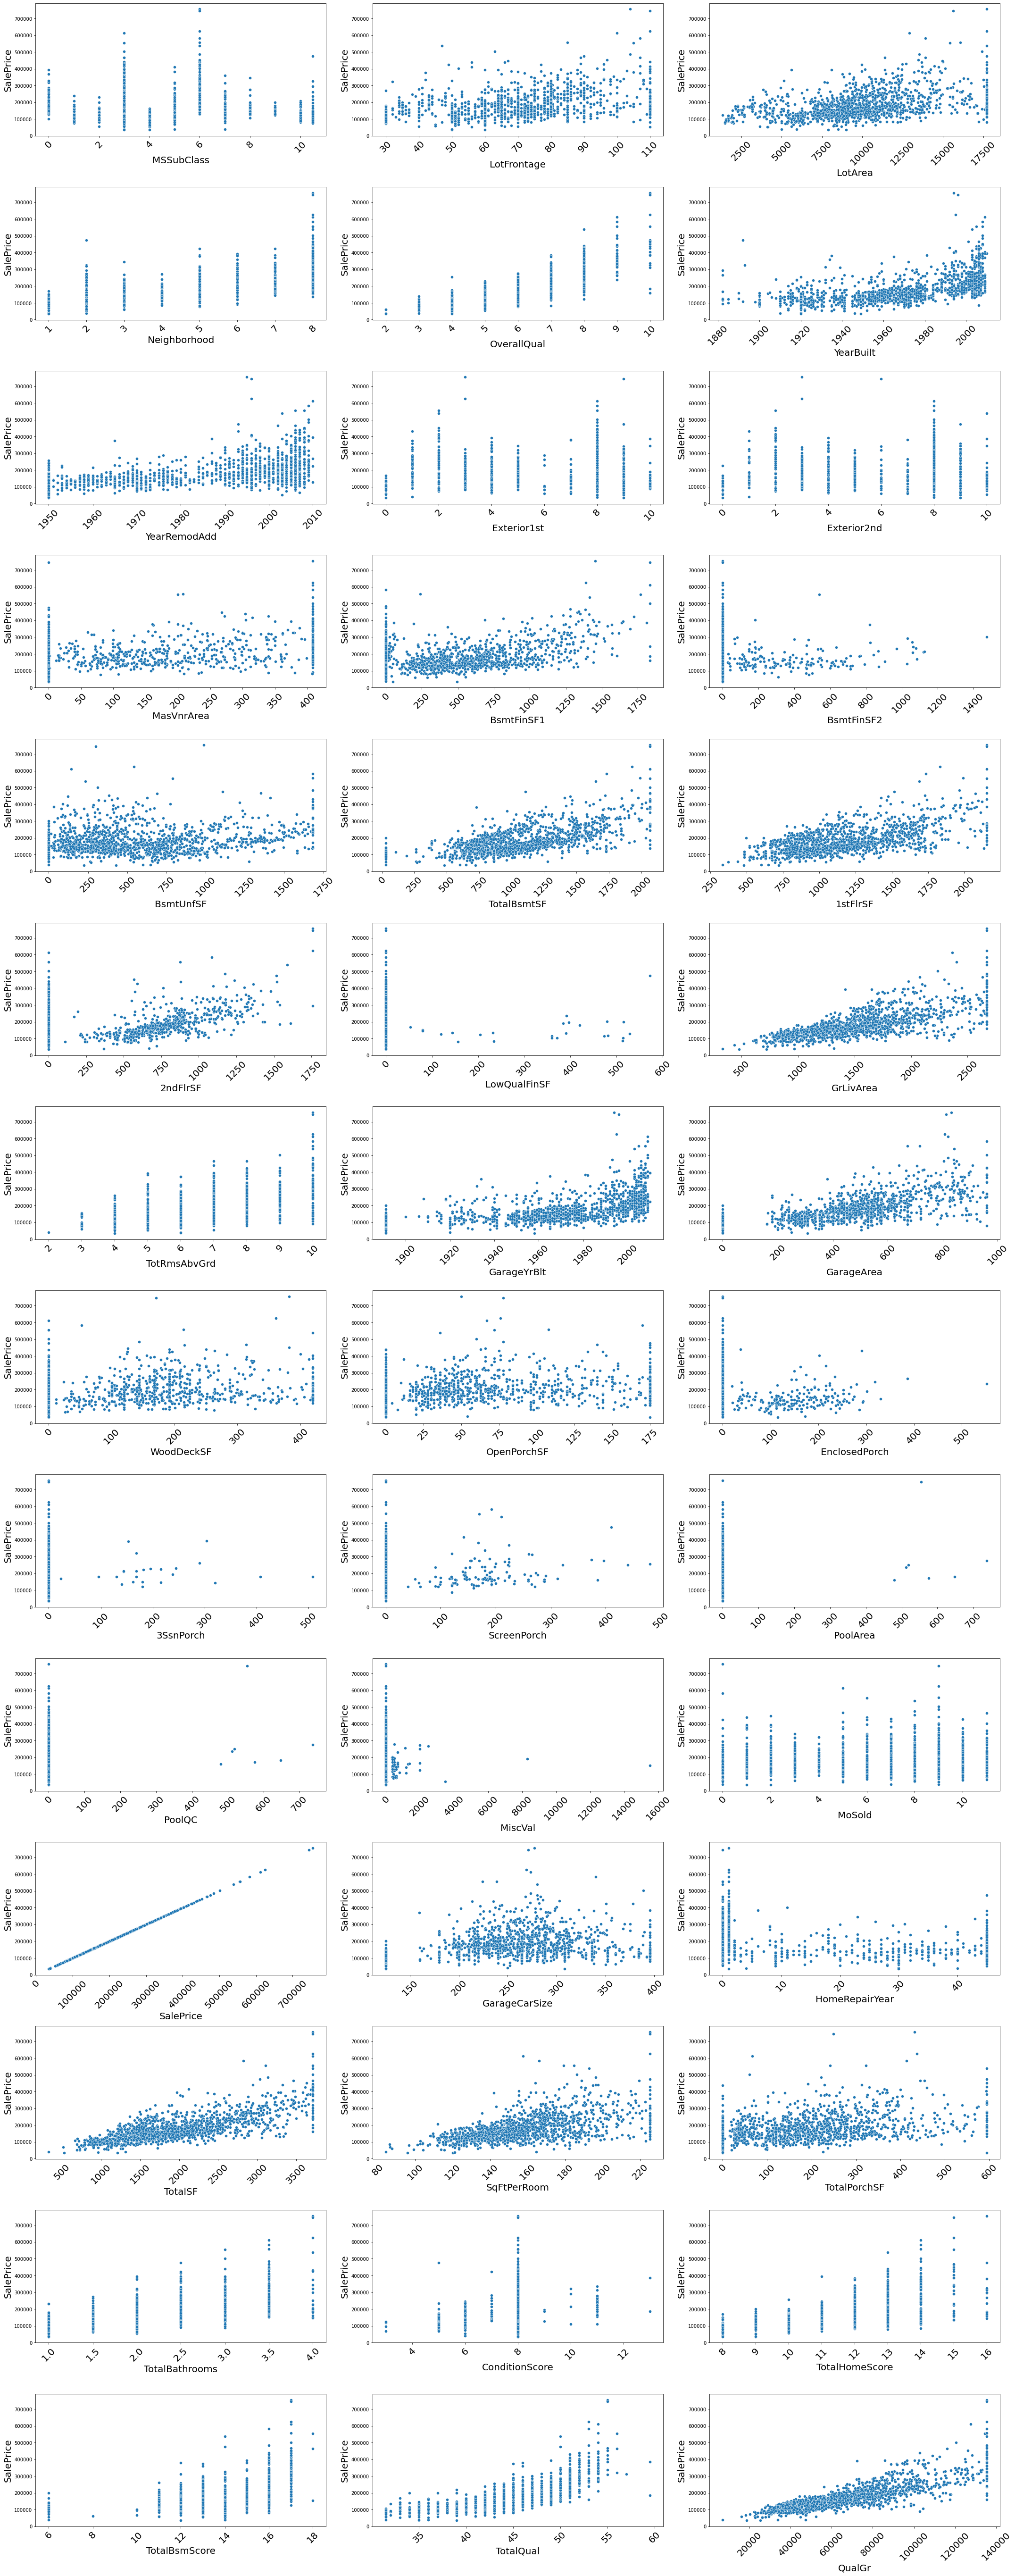

In [66]:
scatterplot_num(df, edited_num_cols, "SalePrice")

In [67]:
for col in edited_num_cols:
    print(f" {col.upper()} : {check_outliers(df, col)}")

 MSSUBCLASS : There Are Not Outliers
 LOTFRONTAGE : There Are Not Outliers
 LOTAREA : There Are Not Outliers
 NEIGHBORHOOD : There Are Not Outliers
 OVERALLQUAL : There Are Not Outliers
 YEARBUILT : There Are Not Outliers
 YEARREMODADD : There Are Not Outliers
 EXTERIOR1ST : There Are Not Outliers
 EXTERIOR2ND : There Are Not Outliers
 MASVNRAREA : There Are Not Outliers
 BSMTFINSF1 : There Are Not Outliers
 BSMTFINSF2 : There Are Outliers
 BSMTUNFSF : There Are Not Outliers
 TOTALBSMTSF : There Are Not Outliers
 1STFLRSF : There Are Not Outliers
 2NDFLRSF : There Are Not Outliers
 LOWQUALFINSF : There Are Outliers
 GRLIVAREA : There Are Not Outliers
 TOTRMSABVGRD : There Are Not Outliers
 GARAGEYRBLT : There Are Not Outliers
 GARAGEAREA : There Are Not Outliers
 WOODDECKSF : There Are Not Outliers
 OPENPORCHSF : There Are Not Outliers
 ENCLOSEDPORCH : There Are Outliers
 3SSNPORCH : There Are Outliers
 SCREENPORCH : There Are Outliers
 POOLAREA : There Are Outliers
 POOLQC : There Are

In [68]:
len(num_cols),len(cat_cols),len(cat_but_car)

(43, 130, 0)

In [69]:
new_label = ['Neighborhood','OverallQual','TotRmsAbvGrd','TotalBathrooms','TotalHomeScore']

dtypes_nunique(df[new_label])

Name    Neighborhood OverallQual TotRmsAbvGrd TotalBathrooms TotalHomeScore
Dtype        float64     float64      float64        float64        float64
Nunique            8           9            9              7              9

In [70]:
for col in new_label:
    label_encoder(df, col)

In [71]:
num_cols = [col for col in num_cols if col not in new_label]
cat_cols = cat_cols + new_label
len(num_cols),len(cat_cols),len(cat_but_car)

(38, 135, 0)

In [72]:
dtypes_nunique(df[num_cols])

Name        Id MSSubClass LotFrontage  LotArea YearBuilt YearRemodAdd Exterior1st Exterior2nd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea  \
Dtype    int64    float64     float64  float64   float64      float64     float64     float64    float64    float64    float64   float64     float64  float64  float64        int64   float64   
Nunique   2919         12          83     1829       114           61          11          11        305        977        272      1091        1016     1043      628           36      1227   

Name    GarageYrBlt GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea PoolQC MiscVal   MoSold SalePrice GarageCarSize HomeRepairYear  TotalSF SqFtPerRoom TotalPorchSF  \
Dtype       float64    float64    float64     float64         int64     int64       int64    int64  int64   int64  float64   float64       float64        float64  float64     float64      float64   
Nunique         104        564        323         156           183        31         121       14     14      38       12       663           465             47     1569        1687          481   

Name    ConditionScore TotalBsmScore TotalQual   QualGr  
Dtype            int64       float64   float64  float64  
Nunique             11            11        30     2349

In [73]:
(dtypes_nunique(df[num_cols]).T.Nunique < 10).sum()

0

In [74]:
(dtypes_nunique(df[cat_cols]).T.Nunique >= 10).sum()

0

In [75]:
pd.to_pickle(df,open("House_Price.pkl","wb"))

In [76]:
######################################
# Standart Scaler
######################################

In [77]:
scaler_num_cols = [col for col in num_cols if col not in ["Id","SalePrice"]]
len(scaler_num_cols)

36

In [78]:
scaler_num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'GarageCarSize',
 'HomeRepairYear',
 'TotalSF',
 'SqFtPerRoom',
 'TotalPorchSF',
 'ConditionScore',
 'TotalBsmScore',
 'TotalQual',
 'QualGr']

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[scaler_num_cols] = scaler.fit_transform(df[scaler_num_cols])

In [80]:
df[scaler_num_cols].head()

MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd  Exterior1st  Exterior2nd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0      0.5714       0.4375   0.4344     0.9452        0.8833       0.8000       0.8000      0.4795      0.3853      0.0000     0.0892       0.4059    0.2867    0.4852        0.0000     0.5891   
1      0.2857       0.6250   0.5046     0.7339        0.4333       0.4000       0.4000      0.0000      0.5337      0.0000     0.1688       0.6054    0.5097    0.0000        0.0000     0.3973   
2      0.5714       0.4750   0.6054     0.9295        0.8667       0.8000       0.8000      0.3963      0.2652      0.0000     0.2579       0.4374    0.3218    0.4920        0.0000     0.6216   
3      0.6667       0.3750   0.5016     0.2564        0.3333       0.9000       1.0000      0.0000      0.1179      0.0000     0.3210       0.3568    0.3444    0.4295        0.0000     0.5921   
4      0.5714       0.6750   0.7893     0.9217        0.8333       0.8000       0.8000      0.8563      0.3574      0.0000     0.2912       0.5479    0.4454    0.5983        0.0000     0.7980   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  MoSold  GarageCarSize  HomeRepairYear  TotalSF  SqFtPerRoom  TotalPorchSF  \
0       0.6364      0.5708      0.0000       0.3486         0.0000     0.0000       0.0000    0.0000  0.0000   0.0000  0.3636         0.5509          0.0217   0.6163       0.4131        0.1027   
1       0.4830      0.4792      0.7095       0.0000         0.0000     0.0000       0.0000    0.0000  0.0000   0.0000  0.6364         0.3880          0.0217   0.5642       0.3969        0.5015   
2       0.6250      0.6333      0.0000       0.2400         0.0000     0.0000       0.0000    0.0000  0.0000   0.0000  1.0000         0.6620          0.0435   0.5737       0.6695        0.0707   
3       0.6080      0.6687      0.0000       0.2000         0.2688     0.0000       0.0000    0.0000  0.0000   0.0000  0.3636         0.3287          1.0000   0.4734       0.7560        0.5166   
4       0.6193      0.8708      0.4571       0.4800         0.0000     0.0000       0.0000    0.0000  0.0000   0.0000  0.2727         0.5682          0.0217   0.7457       0.6019        0.4645   

   ConditionScore  TotalBsmScore  TotalQual  QualGr  
0          0.4545         0.8333     0.6607  0.6111  
1          0.2727         0.6667     0.4464  0.3777  
2          0.4545         0.8333     0.6607  0.6406  
3          0.4545         0.6667     0.5536  0.5737  
4          0.4545         0.8333     0.6964  0.8181

In [81]:
print("Final DataFrame Shape : {}".format(df.shape))

Final DataFrame Shape : (2919, 173)


In [82]:
pd.to_pickle(df , open("Scaler_House_Price.pkl","wb"))